載入需要的模組與讀取檔案(華北次分區B4降水分及工作表)

In [1]:
#-*- coding: utf-8 -*-
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#使用pandas模組讀取excel資料;u表示unicode編碼;sheetname=1表示第二張工作表，0表示第一張;skiprows=3表示前四行略過
df = pd.read_excel(u'K:\\20171027資料前處理\\降水分級20171108\\13-全年_分區_降水分級_不含條目之西曆月份起迄-9999\\華北次分區2\\14-降水10降水異類53乾旱30_華北次分區_全年降水分級.xlsm',sheetname=3)
#顯示前5行資料
df.head()

,ID1,ID2,RankP,Year,day,F1,G1,H1,I1,lon,lat,height,Cid
0,1646-04,4.000,0,1644,1,三月初八日，大風起自西北，晝晦，人不能見，迅雷，紅雨著衣色赤。,152130029;620100009;130164020;530300009,山東省,青州市,118.462492,36.671324,123.3,13028
1,1646-09,9.001,-2,1644,94,夏不雨。,100110189,山東省,膠州市,119.949511,36.238660,88.0,13081
2,1646-09,9.002,0,1644,29,九月雪。,101170100,山東省,膠州市,119.949511,36.238660,88.0,13081
3,1667-40,40.000,1,1647,92,秋大水，霪雨四十餘日，平地出泉。,310130029;100150505;310100009,山東省,昌樂縣,118.912850,36.537723,132.6,13018
4,1667-41,41.000,0,1647,29,秋七月，大水，霪雨連綿，河水氾濫，平地積水尺餘，田禾渰沒。,310130029;100150500;315100209;315135029;310100...,山東省,安丘縣,119.145637,36.328617,99.2,13007


散佈圖

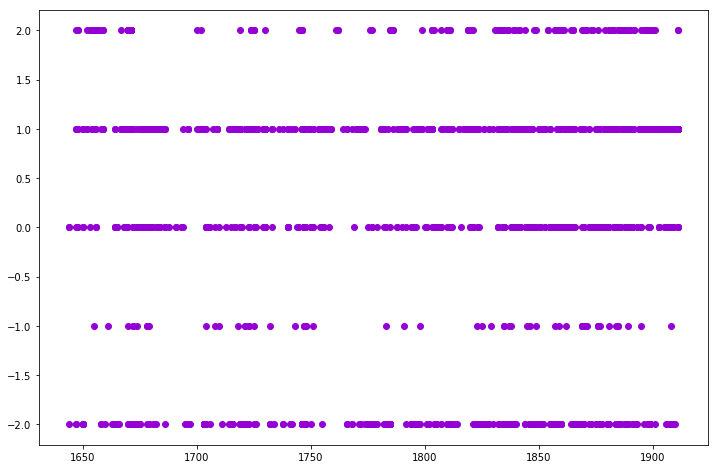

In [2]:
%matplotlib inline
#華北N_B4
fig = plt.figure(figsize=(12,8))
plt.scatter(df.iloc[:,3],df.iloc[:,2], color='darkviolet')

利用groupy計算每一年每一等級數目，只是還是得進excel調整數據，才能進行繪圖

In [3]:
ddata = df["ID1"].groupby([df["RankP"],df["Year"]]).count()
#excel匯出
ddata.to_excel(u'K:\\20171027資料前處理\\降水分級20171108\\13-全年_分區_降水分級_不含條目之西曆月份起迄-9999\\華北次分區2\\pandas_groupby_B4_2.xlsx',sheet_name='Sheet1')

讀取groupby後，每一年每一等級數目

In [4]:
#使用pandas模組讀取excel資料;u表示unicode編碼;sheetname=1表示第二張工作表，0表示第一張;skiprows=3表示前四行略過
df4 = pd.read_excel(u'K:\\20171027資料前處理\\降水分級20171108\\13-全年_分區_降水分級_不含條目之西曆月份起迄-9999\\華北次分區2\\pandas_groupby_B4.xlsx')
#顯示前5行資料
df4.head()

,RankP,Year,ID1,Rank
0,-2.0,1644,1,-2
1,NaN,1647,2,-2
2,NaN,1650,5,-2
3,NaN,1658,2,-2
4,NaN,1660,1,-2


3D散佈圖

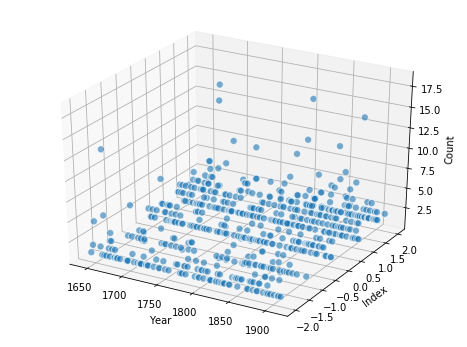

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

xs = df4['Year']
ys = df4['Rank']
zs = df4['ID1']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Year')
ax.set_ylabel('Index')
ax.set_zlabel('Count')

3D散佈圖，加上顏色與點的大小表示資訊，nl=len(df)=1431表示華北B4有1431筆降水分級

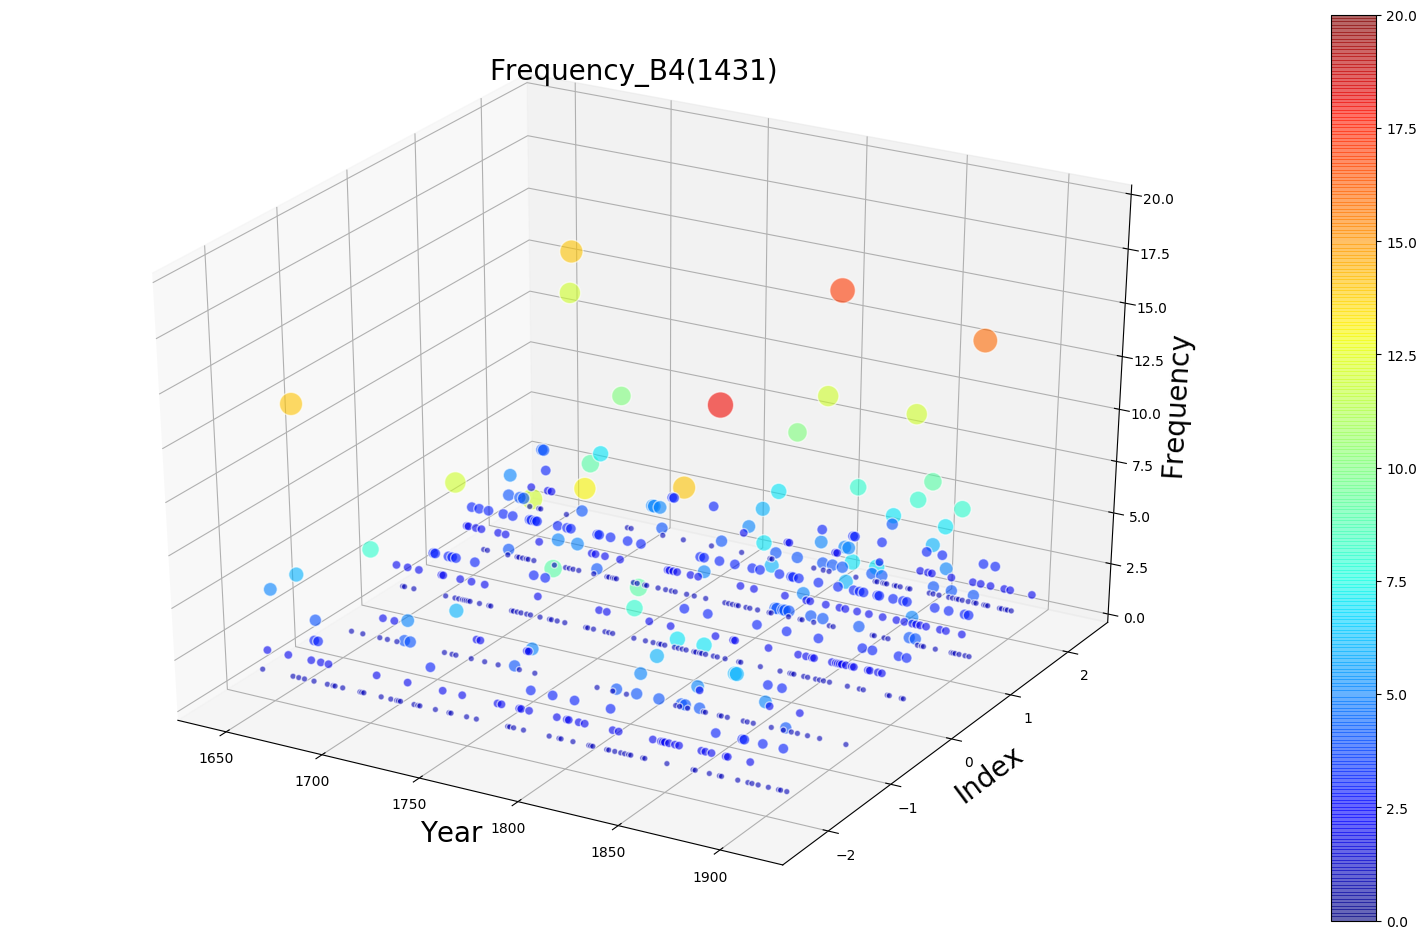

In [6]:
fig = plt.figure(figsize=(20,12), dpi=100)
ax = fig.add_subplot(111, projection='3d')

xs = df4['Year']
ys = df4['Rank']
zs = df4['ID1']
p = ax.scatter(xs, ys, zs, s=zs*20, alpha=0.6, edgecolors='w', c=zs, cmap='jet',vmin=0, vmax=20)
plt.colorbar(p)

ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Index', fontsize=20)
ax.set_zlabel('Frequency', fontsize=20)
ax.set_ylim(-2.6,2.6,1)
ax.set_zlim(0.0, 20.0, 5)
nl = len(df)
ax.set_title("Frequency_B4"+"("+str(nl)+")", fontsize=20)
plt.savefig(u'K:\\20171027資料前處理\\降水分級20171108\\13-全年_分區_降水分級_不含條目之西曆月份起迄-9999\\華北次分區2\\'+'3DFrequency_B4.jpg')

2D散佈圖，加上顏色與點的大小表示資訊，nl=len(df)=1431表示華北B4有1431筆降水分級

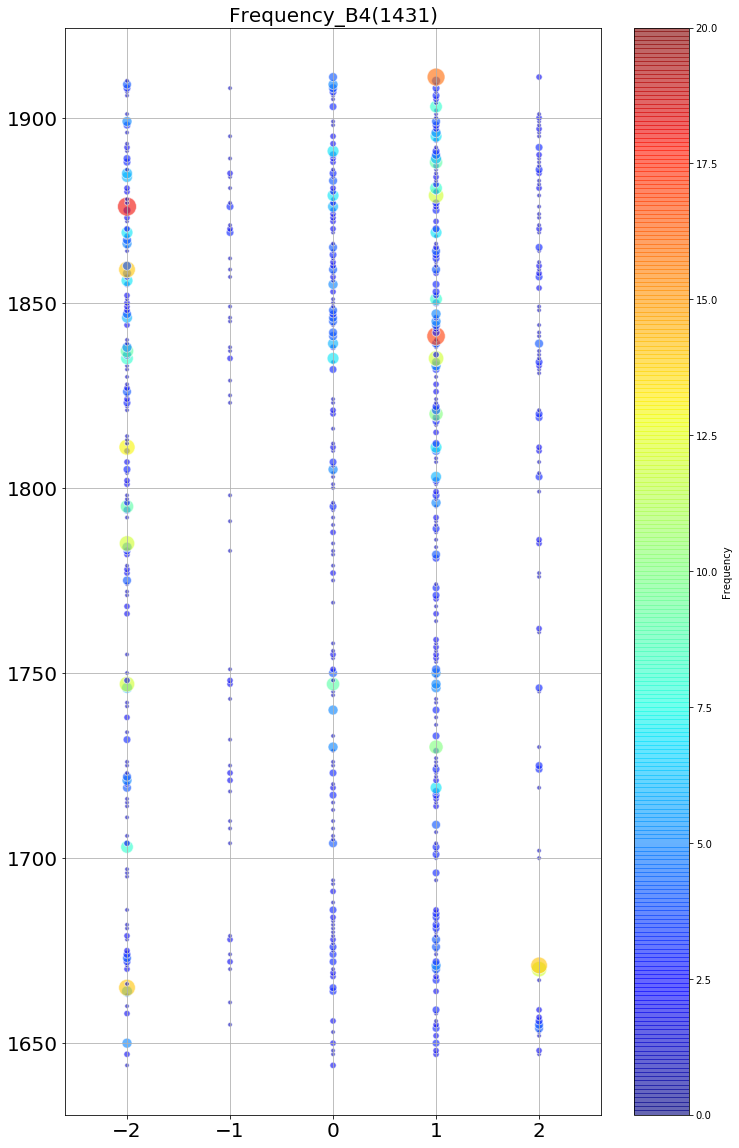

In [16]:
fig = plt.figure(figsize=(12,20))

xs = df4['Year']
ys = df4['Rank']
zs = df4['ID1']
plt.scatter(ys, xs, s=zs*20, alpha=0.6, edgecolors='w', c=zs, cmap='jet',vmin=0, vmax=20)
plt.colorbar(label='Frequency')
plt.xlim(-2.6,2.6,1)
plt.grid(True) 
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.title("Frequency_B4"+"("+str(nl)+")", fontsize=20)
plt.savefig(u'K:\\20171027資料前處理\\降水分級20171108\\13-全年_分區_降水分級_不含條目之西曆月份起迄-9999\\華北次分區2\\'+'2DFrequency_B4.jpg')

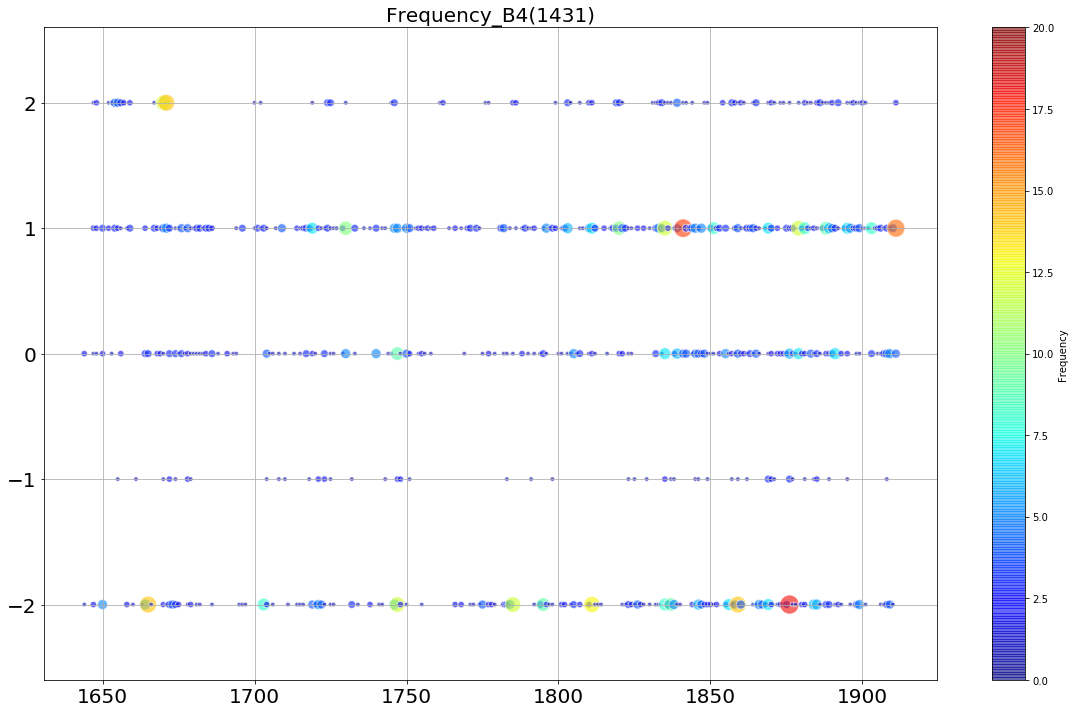

In [18]:
fig = plt.figure(figsize=(20,12))

xs = df4['Year']
ys = df4['Rank']
zs = df4['ID1']
plt.scatter(xs, ys, s=zs*20, alpha=0.6, edgecolors='w', c=zs, cmap='jet',vmin=0, vmax=20)
plt.colorbar(label='Frequency')
plt.ylim(-2.6,2.6,1)
plt.grid(True) 
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.title("Frequency_B4"+"("+str(nl)+")", fontsize=20)
plt.savefig(u'K:\\20171027資料前處理\\降水分級20171108\\13-全年_分區_降水分級_不含條目之西曆月份起迄-9999\\華北次分區2\\'+'2DFrequency_B4_2.jpg')

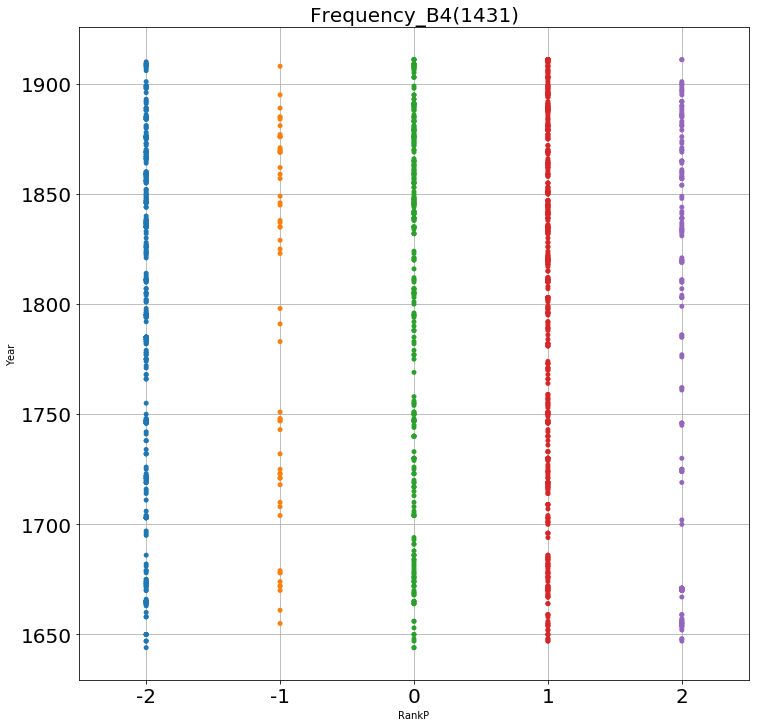

In [19]:
Fig_ts = plt.figure(figsize=(12,12))
sns.stripplot(x="RankP", y="Year", data=df);
plt.grid(True)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.title("Frequency_B4"+"("+str(nl)+")", fontsize=20)
plt.savefig(u'K:\\20171027資料前處理\\降水分級20171108\\13-全年_分區_降水分級_不含條目之西曆月份起迄-9999\\華北次分區2\\'+'2Dstripplot_B4.jpg')

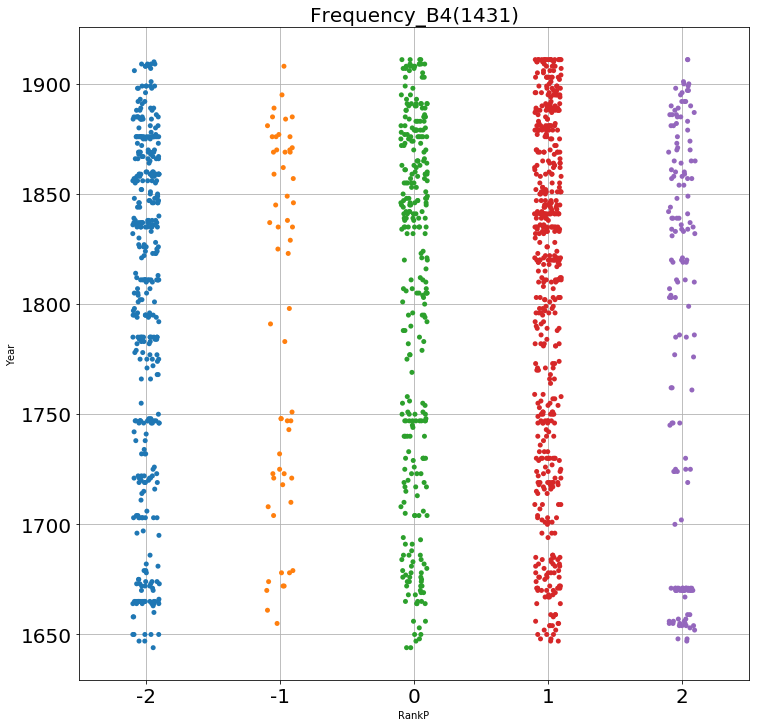

In [21]:
Fig_ts = plt.figure(figsize=(12,12))
sns.stripplot(x="RankP", y="Year", data=df , jitter=True);
plt.grid(True)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.title("Frequency_B4"+"("+str(nl)+")", fontsize=20)
plt.savefig(u'K:\\20171027資料前處理\\降水分級20171108\\13-全年_分區_降水分級_不含條目之西曆月份起迄-9999\\華北次分區2\\'+'2Dstripplot_B4_2.jpg')

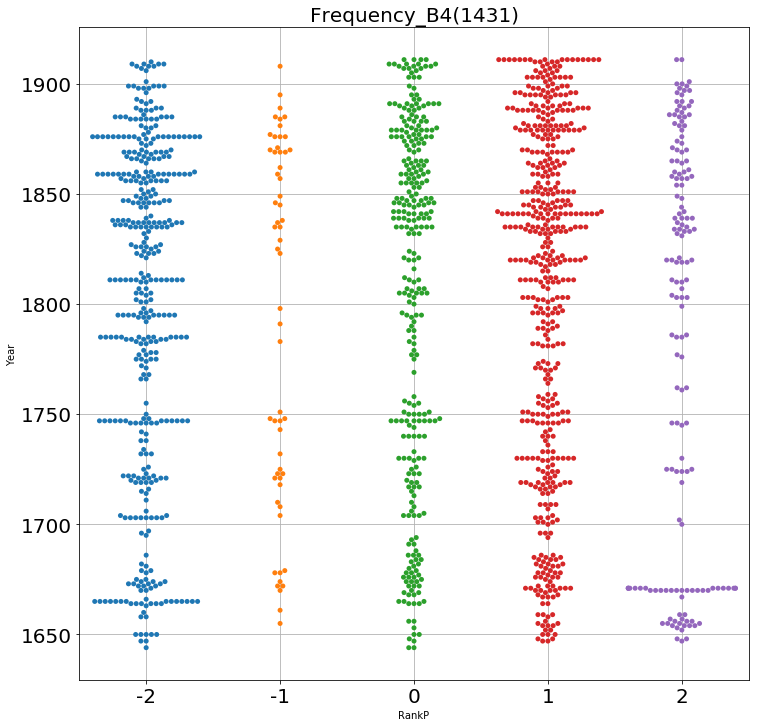

In [22]:
Fig_ts = plt.figure(figsize=(12,12))
sns.swarmplot(x="RankP", y="Year", data=df)
plt.grid(True)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.title("Frequency_B4"+"("+str(nl)+")", fontsize=20)
plt.savefig(u'K:\\20171027資料前處理\\降水分級20171108\\13-全年_分區_降水分級_不含條目之西曆月份起迄-9999\\華北次分區2\\'+'swarmplot_B4.jpg')

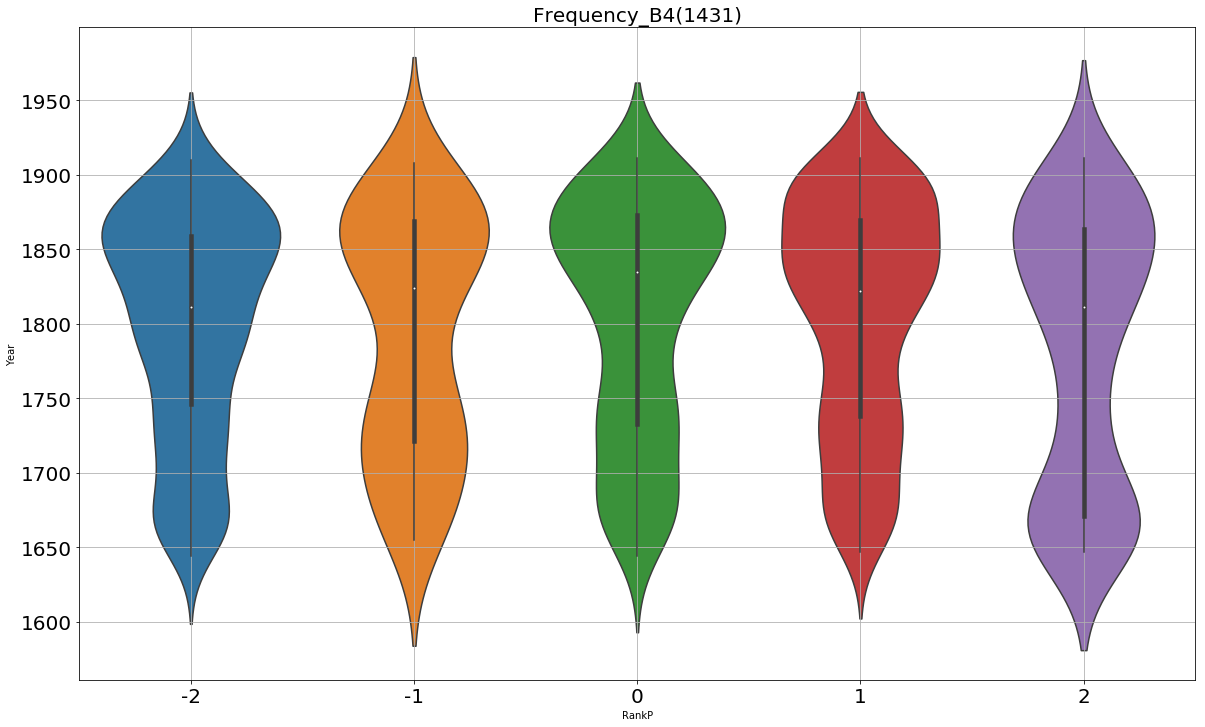

In [23]:
Fig_ts = plt.figure(figsize=(20,12))
sns.violinplot(x="RankP", y="Year", data=df)
plt.grid(True)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.title("Frequency_B4"+"("+str(nl)+")", fontsize=20)
plt.savefig(u'K:\\20171027資料前處理\\降水分級20171108\\13-全年_分區_降水分級_不含條目之西曆月份起迄-9999\\華北次分區2\\'+'violinplot_B4.jpg')

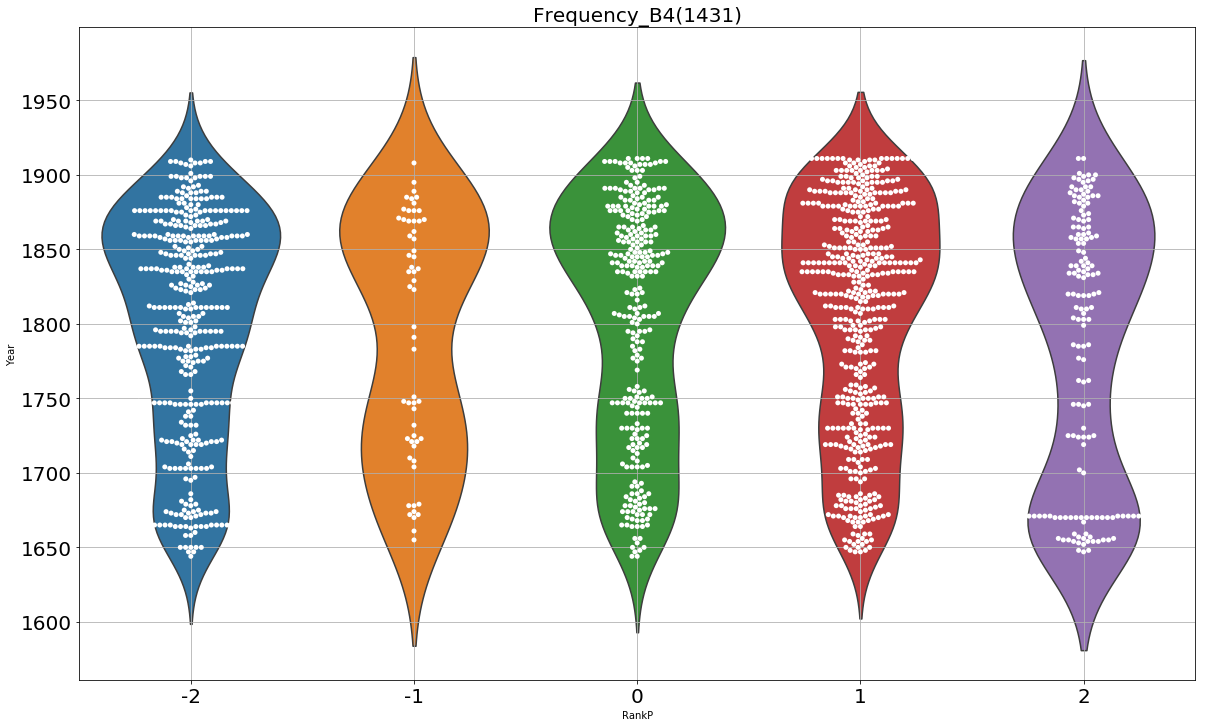

In [24]:
Fig_ts = plt.figure(figsize=(20,12))
sns.violinplot(x="RankP", y="Year", data=df, inner=None)
sns.swarmplot(x="RankP", y="Year", data=df, color="w")
plt.grid(True)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.title("Frequency_B4"+"("+str(nl)+")", fontsize=20)
plt.savefig(u'K:\\20171027資料前處理\\降水分級20171108\\13-全年_分區_降水分級_不含條目之西曆月份起迄-9999\\華北次分區2\\'+'violinswarmplot_B4.jpg')